<a href="https://colab.research.google.com/github/rland93/pendulum/blob/master/notebooks/LQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!rm -rf pendulum
!git clone https://github.com/rland93/pendulum.git

Cloning into 'pendulum'...
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (367/367), done.
remote: Compressing objects: 100% (268/268), done.
remote: Total 367 (delta 157), reused 277 (delta 91), pack-reused 0
Receiving objects: 100% (367/367), 6.55 MiB | 25.31 MiB/s, done.
Resolving deltas: 100% (157/157), done.


Set system path so that pendulum module can be found

In [3]:
import sys
sys.path.append('pendulum/')
print(sys.executable)
print(sys.version)

/usr/bin/python3
3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


Import Packages

In [4]:
import numpy as np
from pendulum import controller, pendulum, sim, utils
from pendulum.viz import Visualizer
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

We set the timestep of the simulation (`dt`), the total simulation time (`t_final`), and create a pendulum. We set the pendulum to be in the upright position: 

$$ [x, \dot{x}, \theta, \dot{\theta}] = [0,0,0,0]$$

In [5]:
dt = 0.01
t_final = 15
pend = pendulum.Pendulum(5.0, 4.0, 5.0, initial_state=np.array([0,0,-.05,0]))

Forcing function

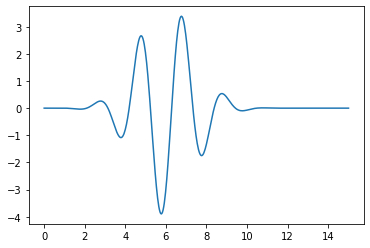

In [8]:
c1, c2, c3, c4 = 2, 3.0, 7, 2
fshift = 6
force_fn = lambda t: c1 * np.sin(c2*t) * c3/(c4*np.sqrt(np.pi)) * np.exp(-((t-fshift)/c4)**2)
fx = np.linspace(0,t_final, 500)
fy = force_fn(fx)
plt.plot(fx, fy)

Simulation definition

In [9]:
simulation = sim.Simulation(dt, t_final, force_fn)

We create a new LQR controller. $Q$ has the weighted cost function over the inputs; here, we penalize error in $\theta$ highest. We also want to penalize control input, becuase it's assumed that we have finite actuation.

In [32]:
Q = [0,0,100,0]
R = 0.0003

cont = controller.LQR(pend, dt, 10, Q, R)

Run the simulation.

In [33]:
results = simulation.simulate(pend, cont, plot=False)

100%|██████████| 1501/1501 [00:03<00:00, 407.12it/s]


View the results

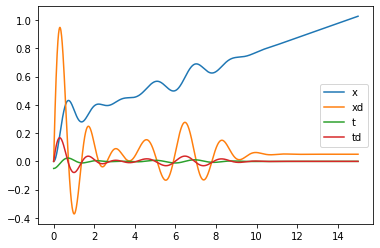

In [34]:
fig, ax = plt.subplots()
for s in results['state']:
    ax.plot(results[('state', s)], label=s)
    ax.legend()

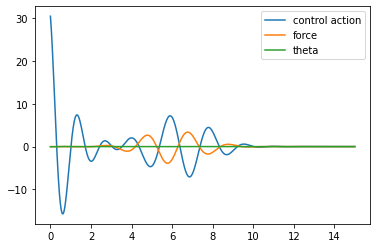

In [35]:
fig, ax = plt.subplots()
ax.plot(results['control action'], label='control action')
ax.plot(results['forces'], label='force')
ax.plot(results[('state', 't')], label='theta')
ax.legend()

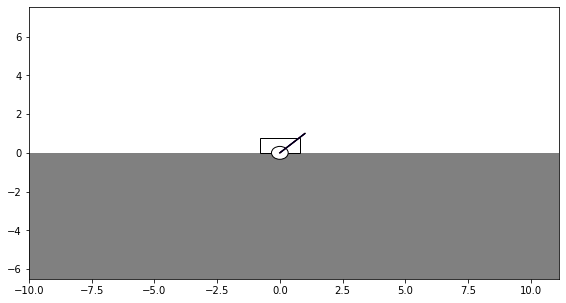

In [36]:
visualizer = Visualizer(results, pend, speed=4)
anim = visualizer.animate((9.5, 5))

In [37]:
HTML(anim.to_html5_video())